<center><font size="10"> 🔥Convolutional Neural Networks🔥 </font></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_sample_image

In [2]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

#### Loading 2 images

In [3]:
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
print(batch_size, height, width, channels )

2 427 640 3


#### Creating filters for those images
#### A vertical one and a horizontal one

In [4]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters

array([[[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 

In [5]:
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  #horizontal line

In [6]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")


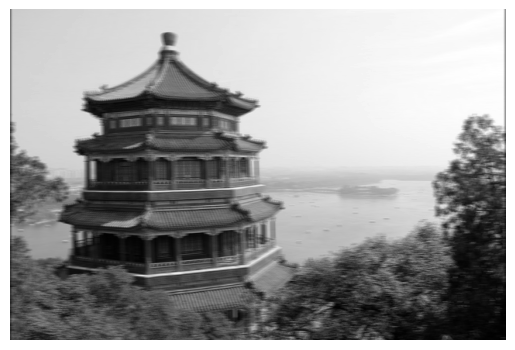

In [7]:
plt.axis("off")
plt.imshow(outputs[0, :,:, 1], cmap="gray")
plt.show()

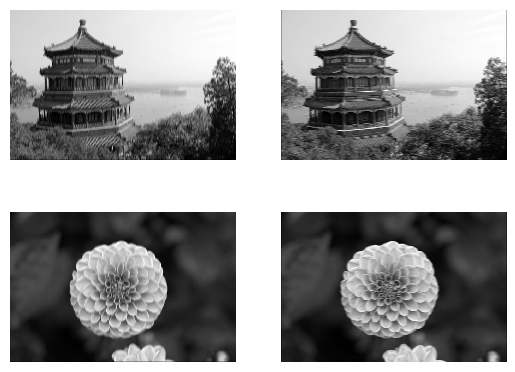

In [8]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])

plt.show()

In [9]:
def crop(images):
    return images[150:220, 130:250]

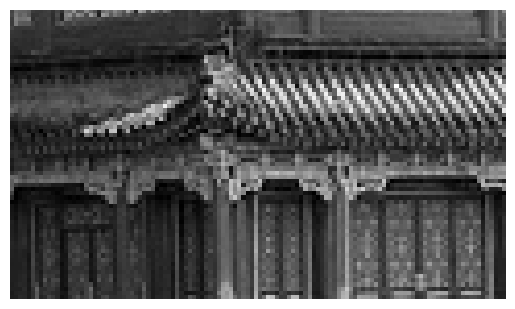

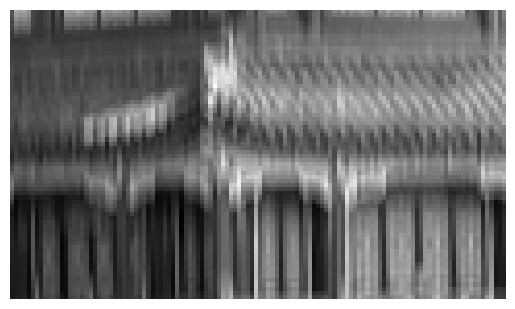

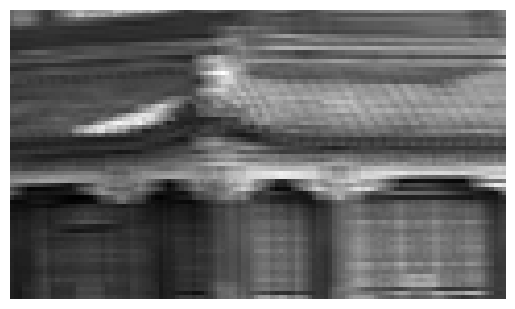

In [10]:

plot_image(crop(images[0, :, :, 0]))
plt.show()

for feature_map_index, filename in enumerate(["china_vertical", "china_horizontal"]):
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    plt.show()

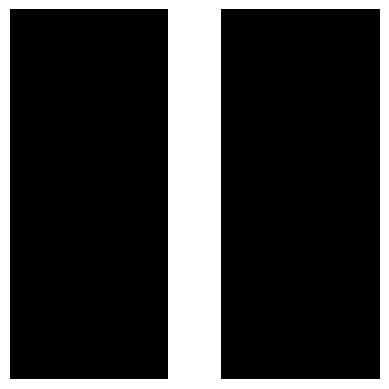

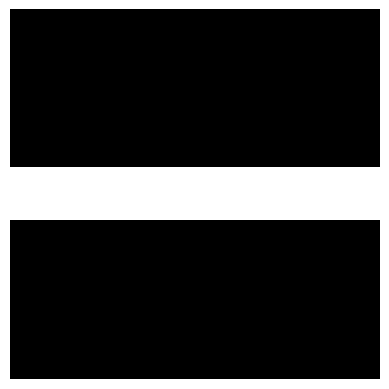

In [11]:
plot_image(filters[:, :, 0, 0])
plt.show()
plot_image(filters[:, :, 0, 1])
plt.show()

In [12]:
conv = keras.layers.Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = "same", activation = 'relu')

In [13]:
conv_outputs = conv(images)
conv_outputs.shape 

TensorShape([2, 427, 640, 32])

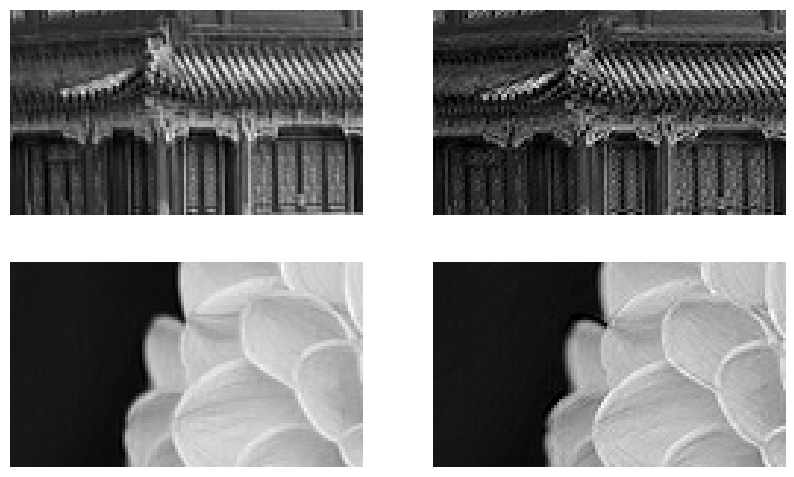

In [14]:
plt.figure(figsize=(10,6))
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(crop(conv_outputs[image_index, :, :, feature_map_index]))
plt.show()

## Pooling
#### Max pooling

In [15]:
max_pool = keras.layers.MaxPool2D(pool_size = 2)

In [16]:
img = np.array([image for image in images], dtype = np.float32)
output = max_pool(img)

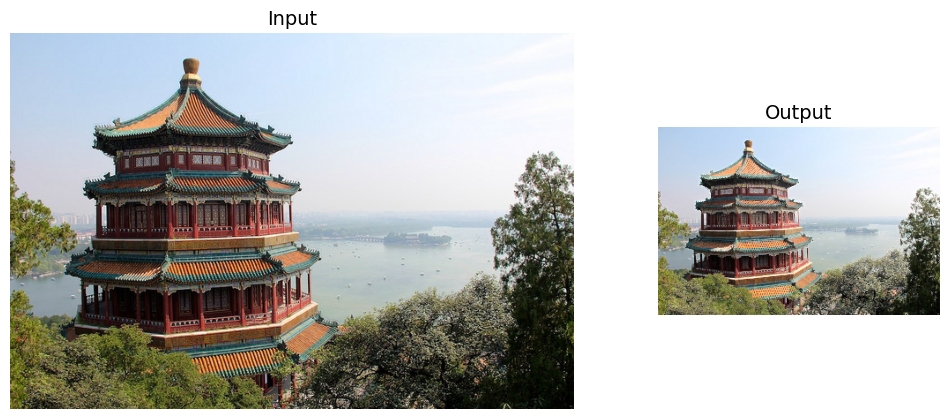

In [17]:
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(img[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[0])  # plot the output for the 1st image
ax2.axis("off")
plt.show()

In [18]:
with tf.device("/cpu:0"):    
    output = tf.nn.max_pool(images, 
                        ksize=(1,1,1,3),
                        strides=(1,1,1,3),
                        padding= "VALID")

In [19]:
depth_pool = keras.layers.Lambda(lambda x : tf.nn.max_pool(images,
                                                            ksize=(1,1,1,3),
                                                            strides=(1,1,1,3),
                                                            padding= "VALID") )

In [20]:
global_avg_pool = keras.layers.GlobalAveragePooling2D()

In [21]:
global_avg_pool = keras.layers.Lambda(lambda X: tf.reduce_mean(X, axis = [1,2]))

#### Fashion MNIST With a CNN

In [22]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [23]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size = 3, activation = "relu", padding = "SAME")

model = keras.models.Sequential([
            keras.layers.Conv2D(64, 7, activation = 'relu', padding = "SAME", input_shape = [28,28,1]),
            keras.layers.MaxPooling2D(2),
            keras.layers.Conv2D(128, 3, activation = 'relu', padding = "SAME"),
            keras.layers.Conv2D(128, 3, activation = 'relu', padding = "SAME"),
            keras.layers.MaxPool2D(2),
            keras.layers.Conv2D(128, 3, activation = "relu", padding = "SAME"),
            keras.layers.Conv2D(128, 3, activation = "relu", padding = "SAME"),
            keras.layers.MaxPool2D(2),
            keras.layers.Flatten(),
            keras.layers.Dense(128, activation = "relu"),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(64, activation = "relu"),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(10, activation = "softmax"),
])

In [24]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])
score = model.evaluate(X_test, y_test)
X_new = X_test[:10]
y_pred = model.predict(X_new)

Epoch 1/30
1719/1719 [==============================] - 37s 21ms/step - loss: 0.7064 - accuracy: 0.7525 - val_loss: 0.3829 - val_accuracy: 0.8576
Epoch 2/30
1719/1719 [==============================] - 36s 21ms/step - loss: 0.4204 - accuracy: 0.8582 - val_loss: 0.3299 - val_accuracy: 0.8760
Epoch 3/30
1719/1719 [==============================] - 36s 21ms/step - loss: 0.3662 - accuracy: 0.8767 - val_loss: 0.3042 - val_accuracy: 0.8900
Epoch 4/30
1719/1719 [==============================] - 36s 21ms/step - loss: 0.3300 - accuracy: 0.8881 - val_loss: 0.2918 - val_accuracy: 0.8934
Epoch 5/30
1719/1719 [==============================] - 36s 21ms/step - loss: 0.3067 - accuracy: 0.8963 - val_loss: 0.2998 - val_accuracy: 0.8934
Epoch 6/30
1719/1719 [==============================] - 36s 21ms/step - loss: 0.2918 - accuracy: 0.9028 - val_loss: 0.2874 - val_accuracy: 0.8962
Epoch 7/30
1719/1719 [==============================] - 36s 21ms/step - loss: 0.2729 - accuracy: 0.9076 - val_loss: 0.2796 -

#### ResNet-34 from scratch

In [25]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [26]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, 7, strides = 2, input_shape = [224, 224, 3], padding = "SAME", use_bias = False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size = 3, strides = 2, padding = "SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides = strides))
    prev_filters = filters

model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation = "softmax"))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 112, 112, 64)      9408      
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 112, 112, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 residual_unit (ResidualUnit  (None, 56, 56, 64)       74240     
 )                                                               
                                                      

![image info](./resnet_arch.png)

#### if u look at the resnet arch we have created the same arch from scratch reffer model summary
#### rather than going to the trouble of creating this whole model from scratch u can use a pre trained model

In [28]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

In [29]:
images_resized = tf.image.resize(images, [224, 224])

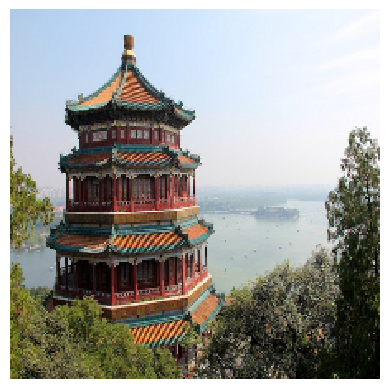

In [30]:
plot_color_image(images_resized[0])
plt.show()

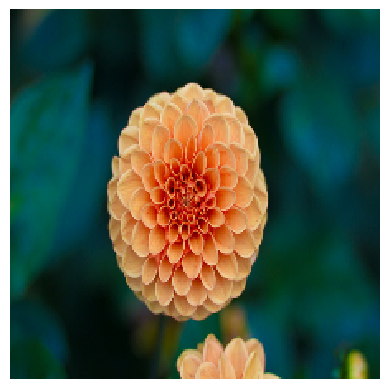

In [31]:
plot_color_image(images_resized[1])
plt.show()

In [32]:
inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)

In [33]:
Y_proba = model.predict(inputs)

1/1 [==============================] - 1s 1s/step


In [34]:
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for image_index in range(len(images)):
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
    print()

Image #0
  n02825657 - bell_cote    82.35%
  n03877845 - palace       6.75%
  n03781244 - monastery    4.19%

Image #1
  n03530642 - honeycomb    49.81%
  n13040303 - stinkhorn    33.96%
  n02206856 - bee          4.35%



In [35]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised = True, with_info=True)
dataset_size = info.splits['train'].num_examples
class_names = info.features['label'].names
n_classes = info.features['label'].num_classes

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\unnikris\tensorflow_datasets\tf_flowers\3.0.1.incompleteGG1U5D\tf_flowers-train.tfrecord*..…

Dataset tf_flowers downloaded and prepared to C:\Users\unnikris\tensorflow_datasets\tf_flowers\3.0.1. Subsequent calls will reuse this data.


In [38]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load("tf_flowers", split=["train[:10%]", "train[10%:25%]", "train[25%:]"], as_supervised=True)

In [39]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

In [41]:
batch_size = 32
train_set = train_set_raw.shuffle(1000).repeat()
train_set = train_set.map(partial(preprocess)).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

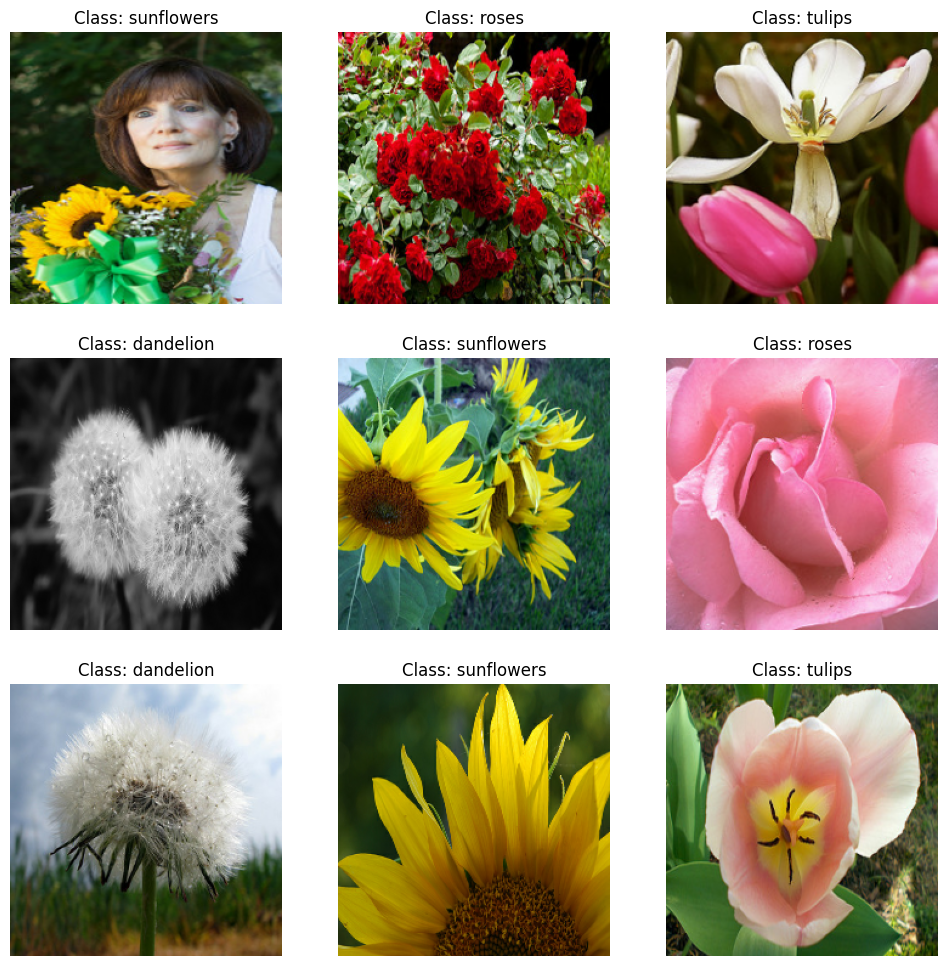

In [42]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in train_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

In [44]:
base_model = keras.applications.xception.Xception(weights="imagenet", include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation = 'softmax')(avg)
model = keras.models.Model(inputs = base_model.input, outputs = output)

In [45]:
for index, layer in enumerate(base_model.layers):
    print(index, layer.name)

0 input_3
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_46
13 block2_pool
14 batch_normalization_40
15 add_12
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_47
23 block3_pool
24 batch_normalization_41
25 add_13
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_48
33 block4_pool
34 batch_normalization_42
35 add_14
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_15
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 blo

In [46]:
for layer in base_model.layers:
    layer.trainable = False


optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay = 0.001)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics=["accuracy"])

history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=5)

Epoch 1/5
86/86 [==============================] - 17s 159ms/step - loss: 1.5505 - accuracy: 0.7882 - val_loss: 1.2616 - val_accuracy: 0.8290
Epoch 2/5
86/86 [==============================] - 12s 145ms/step - loss: 0.6852 - accuracy: 0.9055 - val_loss: 1.2458 - val_accuracy: 0.8438
Epoch 3/5
86/86 [==============================] - 13s 147ms/step - loss: 0.5197 - accuracy: 0.9139 - val_loss: 1.4499 - val_accuracy: 0.8585
Epoch 4/5
86/86 [==============================] - 13s 151ms/step - loss: 0.2846 - accuracy: 0.9466 - val_loss: 1.3840 - val_accuracy: 0.8511
Epoch 5/5
86/86 [==============================] - 13s 152ms/step - loss: 0.1588 - accuracy: 0.9604 - val_loss: 0.9986 - val_accuracy: 0.8695


In [48]:
for layer in base_model.layers:
    layer.trainable = True


optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov = True,decay = 0.001)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics=["accuracy"])

history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=40, callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/40
86/86 [==============================] - 44s 474ms/step - loss: 0.4451 - accuracy: 0.8692 - val_loss: 1.0029 - val_accuracy: 0.8254
Epoch 2/40
86/86 [==============================] - 41s 483ms/step - loss: 0.0867 - accuracy: 0.9735 - val_loss: 0.4075 - val_accuracy: 0.8952
Epoch 3/40
86/86 [==============================] - 41s 476ms/step - loss: 0.0350 - accuracy: 0.9909 - val_loss: 0.3494 - val_accuracy: 0.9044
Epoch 4/40
86/86 [==============================] - 41s 476ms/step - loss: 0.0195 - accuracy: 0.9931 - val_loss: 0.3412 - val_accuracy: 0.9136
Epoch 5/40
86/86 [==============================] - 41s 474ms/step - loss: 0.0085 - accuracy: 0.9975 - val_loss: 0.3880 - val_accuracy: 0.9136
Epoch 6/40
86/86 [==============================] - 41s 474ms/step - loss: 0.0147 - accuracy: 0.9949 - val_loss: 0.3955 - val_accuracy: 0.9136
Epoch 7/40
86/86 [==============================] - 41s 473ms/step - loss: 0.0065 - accuracy: 0.9967 - val_loss: 0.4034 - val_accuracy: 0.9191

## Mean Average Precision

In [52]:
def maximum_precisions(precisions):
    return np.flip(np.maximum.accumulate(np.flip(precisions)))

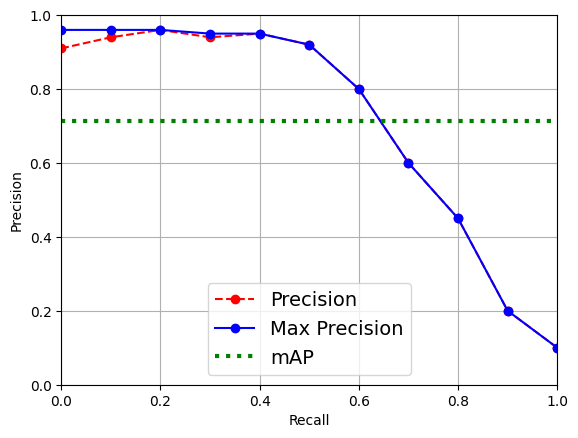

In [53]:
recalls = np.linspace(0, 1, 11)

precisions = [0.91, 0.94, 0.96, 0.94, 0.95, 0.92, 0.80, 0.60, 0.45, 0.20, 0.10]
max_precisions = maximum_precisions(precisions)
mAP = max_precisions.mean()
plt.plot(recalls, precisions, "ro--", label="Precision")
plt.plot(recalls, max_precisions, "bo-", label="Max Precision")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot([0, 1], [mAP, mAP], "g:", linewidth=3, label="mAP")
plt.grid(True)
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower center", fontsize=14)
plt.show()